#Eploration of DNN design choices using MNIST dataset

In [ ]:
from keras.datasets import mnist

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import tensorflow
import matplotlib.pyplot as plt


In [ ]:
batch_size = 128
num_classes = 10

epochs = 2
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


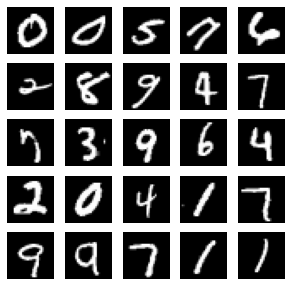

In [ ]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

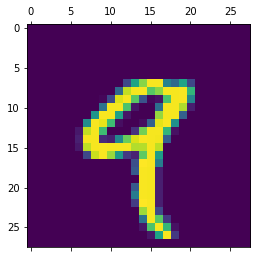

In [ ]:
plt.matshow(x_train[4])

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

In [ ]:
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
np.argmax(y_train[4])

9

In [ ]:
from tensorflow.keras.models import Sequential,model_from_json
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import RMSprop,SGD,Adam

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 32)                25120     
                                                                 
 dense_8 (Dense)             (None, 32)                1056      
                                                                 
 dense_9 (Dense)             (None, 32)                1056      
                                                                 
 dense_10 (Dense)            (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',

optimizer=RMSprop(),
metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)

Epoch 1/2
469/469 [==============================] - 2s 4ms/step - loss: 1.5270 - accuracy: 0.6219
Epoch 2/2
469/469 [==============================] - 2s 3ms/step - loss: 0.6088 - accuracy: 0.8527


In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.45769819617271423
Test accuracy: 0.8870000243186951


In [ ]:
# Print the predicted values and the corresponding digit
prediction = model.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [9.34355795e-01 1.90963619e-05 1.36102205e-02 1.34265923e-03
 2.35569337e-03 3.01943980e-02 1.61519891e-03 1.55646150e-04
 1.45974718e-02 1.75385526e-03]

Thresholded output
 [1 0 0 0 0 0 0 0 0 0]


In [ ]:
modell = Sequential()
modell.add(Dense(32, activation='relu', input_shape=(784,)))
modell.add(Dense(32, activation='relu'))
modell.add(Dense(num_classes, activation='softmax'))
modell.summary()
print("----------------------------------------------------------------------------")
modell.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print("----------------------------------------------------------------------------")
history = modell.fit(x_train,y_train,batch_size=128,epochs=10,verbose=2)

print("----------------------------------------------------------------------------")
score = modell.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("----------------------------------------------------------------------------")
prediction = modell.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 32)                25120     
                                                                 
 dense_12 (Dense)            (None, 32)                1056      
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
----------------------------------------------------------------------------
----------------------------------------------------------------------------
Epoch 1/10
469/469 - 2s - loss: 0.5072 - accuracy: 0.8513 - 2s/epoch - 3ms/step
Epoch 2/10
469/469 - 1s - loss: 0.2258 - accuracy: 0.9332 - 1s/epoch - 3ms/step


In [ ]:
model1 = Sequential()
model1.add(Dense(2056, activation='relu', input_shape=(784,)))
model1.add(Dense(1028, activation='relu'))
model1.add(Dense(512, activation='relu'))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(4, activation='relu'))
model1.add(Dense(num_classes, activation='softmax'))
model1.summary()
print("------------------------------------------------------------------------------")
model1.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print("------------------------------------------------------------------------------")
history = model1.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2)

print("------------------------------------------------------------------------------")
score = model1.evaluate(x_test, y_test, verbose=2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("------------------------------------------------------------------------------")
prediction = model1.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 2056)              1613960   
                                                                 
 dense_22 (Dense)            (None, 1028)              2114596   
                                                                 
 dense_23 (Dense)            (None, 512)               526848    
                                                                 
 dense_24 (Dense)            (None, 128)               65664     
                                                                 
 dense_25 (Dense)            (None, 32)                4128      
                                                                 
 dense_26 (Dense)            (None, 4)                 132       
                                                                 
 dense_27 (Dense)            (None, 10)               

Test loss: 0.11076484620571136
Test accuracy: 0.9817000031471252
------------------------------------------------------------------------------
Prediction
 [1.0000000e+00 0.0000000e+00 9.0416069e-20 2.4047366e-17 1.1204756e-17
 2.0701982e-18 8.4328711e-15 3.4847941e-38 1.2574774e-36 3.3308220e-10]

Thresholded output
 [1 0 0 0 0 0 0 0 0 0]


In [ ]:
model2 = Sequential()
model2.add(Dense(32, activation='relu', input_shape=(784,)))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()
print("------------------------------------------------------------------------------")
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print("------------------------------------------------------------------------------")
history=model2.fit(x_train,y_train,batch_size=batch_size,epochs=10,verbose=2)

print("------------------------------------------------------------------------------")
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("------------------------------------------------------------------------------")
prediction = model2.predict(x_test[10:11])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)